Dr. Marques' Introduction to Data Science guest talk - Fall 2020

Step 3

**Improvements in this step**

1. Make data clean-up more explicit
1. Explain why certain numbers were chosen (what assumptions are behind them)
1. Explain what the code blocks are doing (the ones we added in this step)

**What stills need to be improved**

1. Explain what the code blocks are doing (the ones from the previous step)
1. Make the graphs easier to read
1. Make the code more flexible with constants
1. Make the code more difficult to break
1. Describe limitations of the conclusion

-----------------

# Purpose

This notebook investigates the question "Is there gender discrimination in the salaries of an organization?"

To answer the question, it assumes that people in the same position, performing at the same level, should have comparable salaries, independent of their gender.

# Exploratory data analysis

This section reviews the data available for the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
salaries = pd.read_csv("data/salaries.csv")

## What data do we have?

Columns in the dataset:

In [3]:
salaries.columns

Index(['earn', 'height', 'sex', 'ed', 'age', 'race'], dtype='object')

The dataset has these pieces of information for each employee:

1. `earn`: the annual salary
1. `height`: the height in inches
1. `sex`: the gender
1. `ed`: number of years of education
1. `age`: age in years
1. `race`: the race

## Can we trust the data?

### Are there empty values?

In [4]:
print(salaries.isnull().sum())

earn      0
height    0
sex       0
ed        0
age       0
race      0
dtype: int64


All values are present

### Do the columns have the correct data type?

In [5]:
print(salaries.dtypes)

earn      float64
height    float64
sex        object
ed          int64
age         int64
race       object
dtype: object


The columns have the correct data type.

### Do the numeric values make sense?

In [6]:
salaries.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


There indications of possible issues with the numeric values:

1. `earn`: minimum salary is low, doesn't seem to be a valid annual salary.
1. `ed`:  very low years of education in some cases. They may be correct, but they may skew the analysis.
1. `age`: there are some large values for age. They may be correct, but they may skew the analysis.

We will check them in more details later.

### Do the categorical values make sense?

Does the `sex` columns make sense?

In [7]:
salaries.sex.unique()

array(['male', 'female'], dtype=object)

The values are the expected ones (we are assuming the standard binary genre identification - in real-life we should check with human resources if this task is about biological gender or if we should consider non-traditional genders, in which case the dataset may be wrong).

Does the `race` column make sense?

In [8]:
salaries.race.unique()

array(['white', 'other', 'hispanic', 'black'], dtype=object)

The values seem correct (we are missing some races, e.g. "asian" - in real life we should stop here and ask human resources if this is what they would expect to see in the data).

# Data clean-up

**REWORK NOTE**: changes to the notebook start here. Data cleanup may introduce errors that invalidate the analysis. We need to document what we are doing and how we are doing it (e.g. why we picked certain values) to let domain experts (e.g. human resource representatives) validate our changes.

In the exploratory data analysis we noticed possible issues with some pieces of data:

1. `earn`: minimum salary is low, doesn't seem to be a valid annual salary.
1. `ed`: very low years of education in some cases. They may be correct, but they may skew the analysis.
1. `age`: there are some large values for age. They may be correct, but they may skew the analysis.

In this section we will check them in more details and clean up if needed.

## Salary range clean-up

**REWORK NOTE**: in the previous notebook, this was together with the analysis section. It was moved here to keep all data cleanup in one place.

The `earn` column has some low values:

In [9]:
salaries.earn.describe()

count      1192.000000
mean      23154.773490
std       19472.296925
min         200.000000
25%       10000.000000
50%       20000.000000
75%       30000.000000
max      200000.000000
Name: earn, dtype: float64

Low salaries may indicate employees that were not present for the entire period of data collection or may have some special work arrangement. Either way, they may be skewing the analysis.

We will exclude salaries below \$14,500 because this is what someone working full time (40 hours/week) would make with the current minimum wage ([$7.25 when this was written](https://www.dol.gov/general/topic/wages/minimumwage)). Note that it assumes the person works 52 weeks/year (no vacation).

**REWORK NOTE**: the value we picked may or may not be correct. That's not the main point. The main point is that we are documenting why we picked that value, with links to references. This allows us to review with domain experts later (for example, review with a representative from human resources).

In [10]:
salaries = salaries[salaries.earn >= 14_500]
salaries.earn.describe()

count       784.000000
mean      31229.881378
std       19444.688567
min       14500.000000
25%       20000.000000
50%       25000.000000
75%       35000.000000
max      200000.000000
Name: earn, dtype: float64

## Age clean-up

The `age` column has some high values:

In [11]:
salaries.age.describe()

count    784.000000
mean      41.457908
std       14.490699
min       18.000000
25%       31.000000
50%       38.000000
75%       48.250000
max       91.000000
Name: age, dtype: float64

We will exclude ages over 66 years because [this is the full retirement age](https://www.ssa.gov/benefits/retirement/learn.html). The assumption behind this cutoff value is that employees working past the full retirment retirement age are working under different conditions than younger employees, possibly fewer hours or highly compensated, critical employees. Either way, they would skew the analysis if left in the dataset.

In [12]:
salaries = salaries[salaries.age < 66]
salaries.age.describe()

count    721.000000
mean      38.532594
std       10.849570
min       18.000000
25%       30.000000
50%       37.000000
75%       45.000000
max       65.000000
Name: age, dtype: float64

## Education level clean up

The `ed` column has some low values:

In [13]:
salaries.ed.describe()

count    721.000000
mean      14.109570
std        2.279846
min        7.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       18.000000
Name: ed, dtype: float64

We will exclude education levels below 12 years because [this is the number of years to finish high-school](https://en.wikipedia.org/wiki/Education_in_the_United_States). The assumption behind this cutoff value is that employees working before they complete high school are part-time employees, working different numbers of hours, possibly in different shifts. That variance would also skew the analysis if left in the dataset.

In [14]:
salaries = salaries[salaries.ed >= 12]
salaries.ed.describe()

count    683.000000
mean      14.342606
std        2.091678
min       12.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       18.000000
Name: ed, dtype: float64

## Cleaned-up data

Show what we have left.

In [15]:
salaries.describe()

,earn,height,ed,age
count,683.000000,683.000000,683.000000,683.000000
mean,31867.506589,67.480991,14.342606,38.366032
std,20239.320668,3.846295,2.091678,10.641071
min,14500.000000,57.503219,12.000000,18.000000
25%,20000.000000,64.326516,12.000000,30.000000
50%,26000.000000,67.242771,14.000000,37.000000
75%,35000.000000,70.490709,16.000000,45.000000
max,200000.000000,77.051282,18.000000,65.000000


## Unused data

Although there are indications that taller people make more money, the difference is small and applies to both men and women, with a slightly more pronounced effect for men ([source 1](https://en.wikipedia.org/wiki/Height_discrimination), [source 2](https://www.theatlantic.com/business/archive/2015/05/the-financial-perks-of-being-tall/393518/)).

Because of the small effect and the fact that it applies to both men and women, we will remove the height column to reduce noise in the remainder of the analysis.

In [16]:
salaries.drop("height", axis="columns", inplace=True)
salaries.columns

Index(['earn', 'sex', 'ed', 'age', 'race'], dtype='object')

# Gender distribution in the dataset

Now that the dataset is cleaned up, we need to check if both genders are similarly represented. A gender-skewed dataset is still useful for the analysis, but makes it more difficult.

In [17]:
print(
    f"The dataset has {len(salaries[salaries.sex == 'female'])} female"
    f" and {len(salaries[salaries.sex == 'male'])} male samples"
)

The dataset has 342 female and 341 male samples


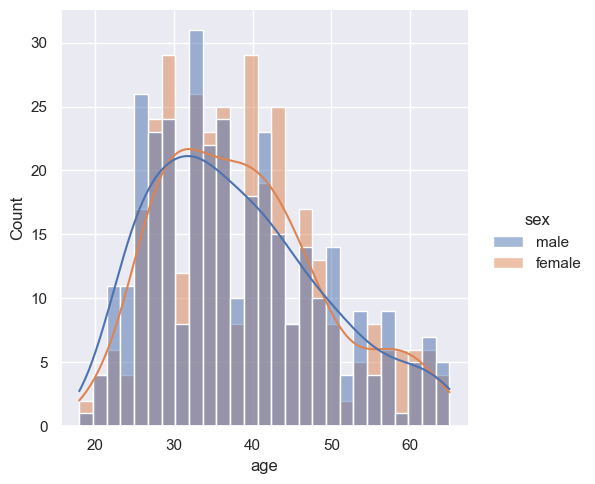

In [18]:
sns.displot(salaries, x="age", hue="sex", bins="sqrt", kde=True)

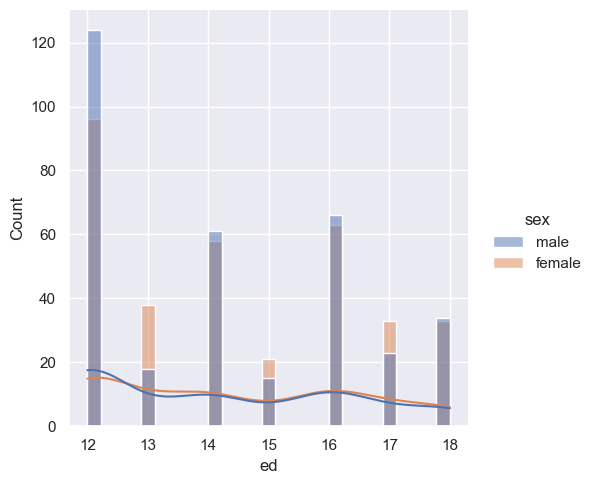

In [19]:
sns.displot(salaries, x="ed", hue="sex", bins="sqrt", kde=True)

We can observe in the distributions that:

* The number of females and males in the cleaned-up dataset is about the same.
* There are variations in the age distribution, but not a large one.
* There are few instances for the younger and older age groups. This may or may not be a problem. We will check that later.
* The education distribution is about the same, with a few exceptions.

**REWORK NOTE**: changes to the notebook end here.

# Analysis

We will start with an overview of the relationships among the features (columns), split by sex.

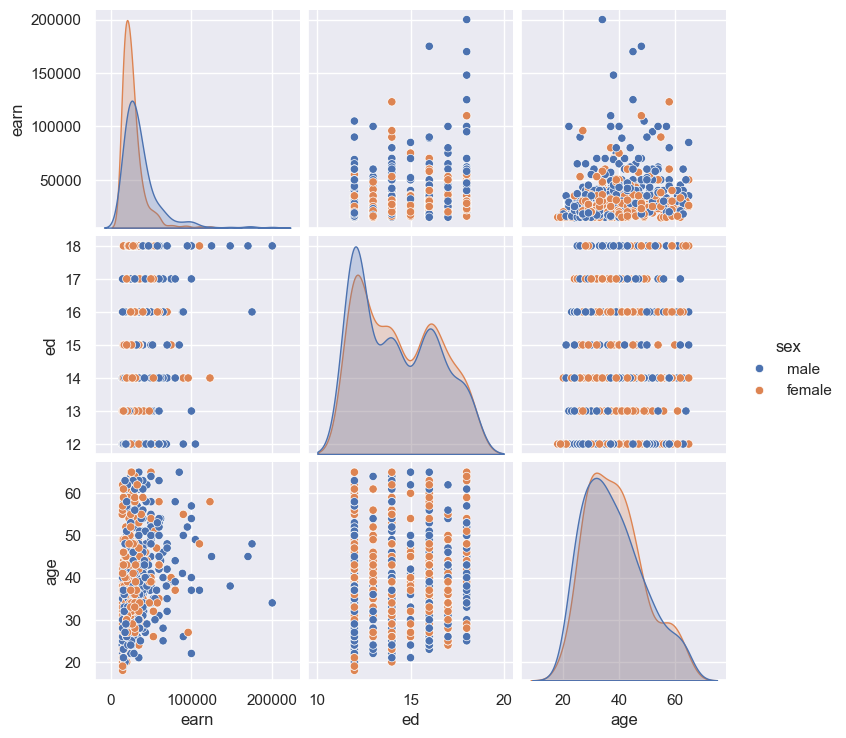

In [20]:
sns.pairplot(salaries, hue="sex")

In [21]:
salaries.groupby(["sex", "race"]).size().unstack()

race,black,hispanic,other,white
sex,,,,
female,36,17,8,281
male,25,19,7,290


## Analyzing experience

<Axes: xlabel='age', ylabel='earn'>

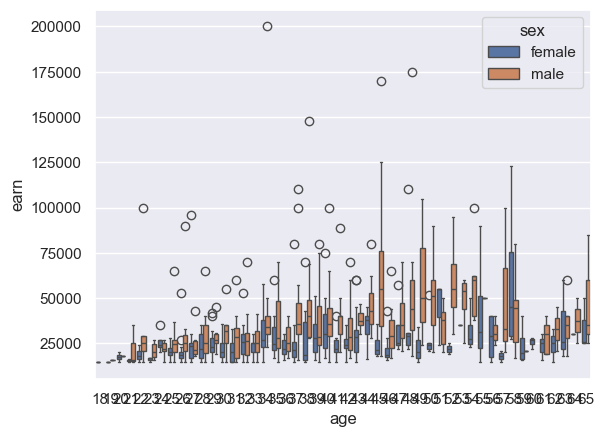

In [22]:
sns.boxplot(data=salaries, x="age", y="earn", hue="sex")

This plot shows that females earn less on average. More importantly, females earn less in all quartiles and have fewer outliers in the fourth quartile (the higher end of salaries).

## Analyzing education level

<Axes: xlabel='ed', ylabel='earn'>

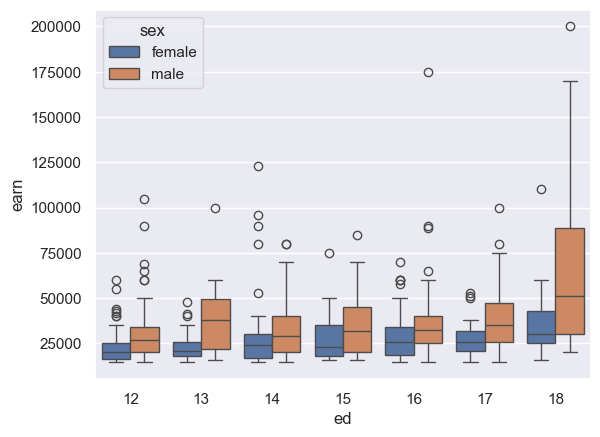

In [23]:
sns.boxplot(data=salaries, x="ed", y="earn", hue="sex")

This plot also shows that females earn less than males on average, and again the quartiles are lower for females.

# Conclusions

We collected enough evidence to point to potential gender discrimination in salaries at this company:

- For the same age level, females make less on average and in general (all quartiles).
- For the same education level, females again make less on average and in general.